In [36]:

from plot import plot_lc
from error import error_func
from platesolve import light_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('report.mplstyle')
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde

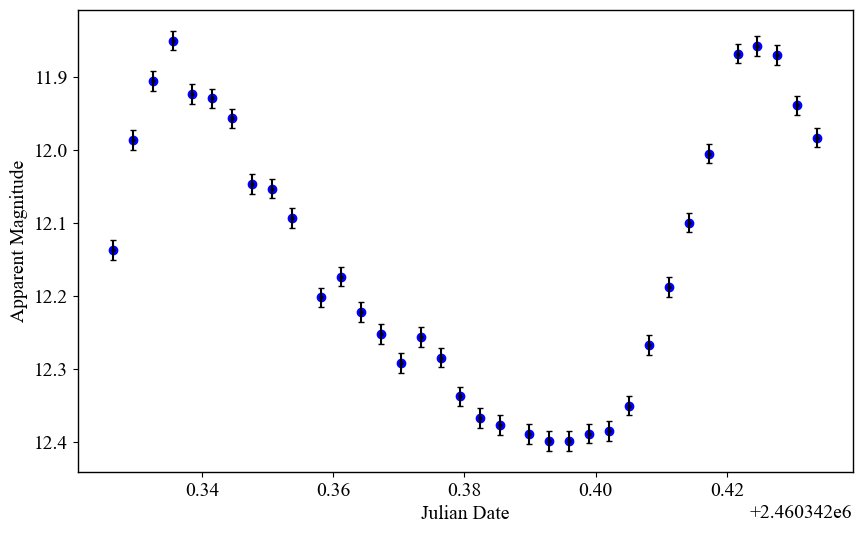

In [88]:
data = pd.read_csv('NSVS7293918_G.txt')

magnitude = data['Magnitude']
time = data['JD']
error = data[' Mag_err']

plt.figure(figsize=(10, 6))
plt.scatter(time, magnitude, color='blue', marker='o')
plt.errorbar(time, magnitude, yerr=error, fmt='o', color='black', markersize=2, capsize=2)

plt.gca().invert_yaxis()
plt.xlabel('Julian Date')
plt.ylabel('Apparent Magnitude')
plt.savefig('light_curve.pdf')
plt.show()


In [183]:
def fitter(x):
    if x < 0:
        return 0
    if x >= 0 and x <= 2460342.3525:
        return ((((x-x_0)*10))**2)+12
    if x > 2460342.3525 and x <= 2460342.38:
        return ((x-x_0)*300)
    if x > 2460342.38 and x <= 2460342.44:
        return np.sin(x-x_0)
time = np.sort(time)
y_data = []
for i in range(len(time)):
    if i == 0:
        x_0 = time[i]
    y_dat = fitter(time[i])
    y_data.append(y_dat)

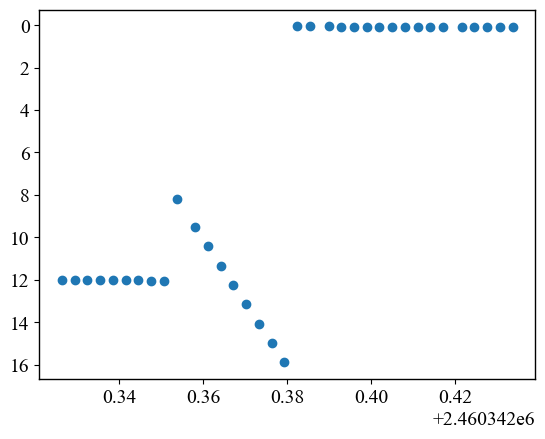

In [184]:
plt.scatter(time, y_data)

plt.gca().invert_yaxis()

In [111]:
x = time

# , x > 2460342.3525 & x <= 2460342.38, x > 2460342.38 & x <= 2460342.44, x > 2460342.44]            , lambda x: x-x[0]   , lambda x: np.sin((x-x[0])), lambda x: x-x[0]
y = np.piecewise(x, [(x < 0), (x >= 0) & (x <= 2460342.3525)],[lambda x: x , lambda x: (x)**2])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

ValueError: x and y must have same first dimension, but have shapes (35,) and (100,)

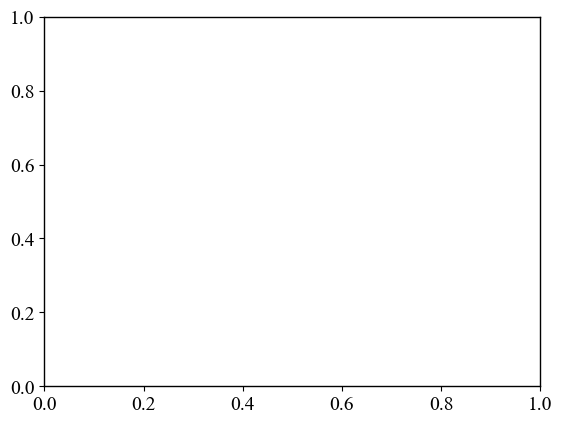

In [91]:
plt.plot(x, y)
